In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

Epoch Number:  17


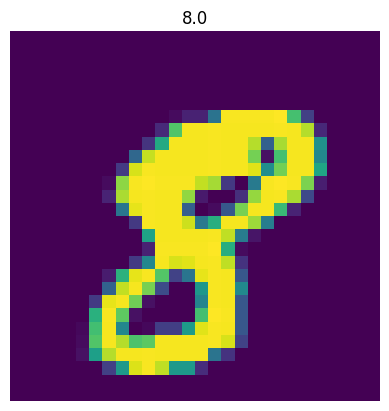

33600
8400


In [8]:
# load data
train = pd.read_csv("./train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
print("Epoch Number: ",num_epochs)

# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

print(len(train_loader.dataset))
print(len(test_loader.dataset))

In [11]:
# Number of steps to unroll
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as a torch tensor with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size 100, 10
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = error(outputs, labels)

        # Getting gradients
        loss.backward()

        # Updating parameters
        optimizer.step()

        count += 1

        if count % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            for images, labels in test_loader:
                
                images = images.view(-1, seq_dim, input_dim)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            
            loss_list.append(loss.data.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(count, loss.data.item(), accuracy))

Iteration: 500. Loss: 2.271550178527832. Accuracy: 18.738094329833984
Iteration: 1000. Loss: 1.468084454536438. Accuracy: 57.738094329833984
Iteration: 1500. Loss: 0.7299423813819885. Accuracy: 73.4047622680664
Iteration: 2000. Loss: 0.29778286814689636. Accuracy: 89.21428680419922
Iteration: 2500. Loss: 0.23394760489463806. Accuracy: 93.42857360839844
Iteration: 3000. Loss: 0.12808702886104584. Accuracy: 94.8452377319336
Iteration: 3500. Loss: 0.25498414039611816. Accuracy: 95.72618865966797
Iteration: 4000. Loss: 0.027475712820887566. Accuracy: 96.25
Iteration: 4500. Loss: 0.10641063004732132. Accuracy: 96.23809814453125
Iteration: 5000. Loss: 0.02523455210030079. Accuracy: 96.44047546386719
Iteration: 5500. Loss: 0.1464196741580963. Accuracy: 96.30952453613281


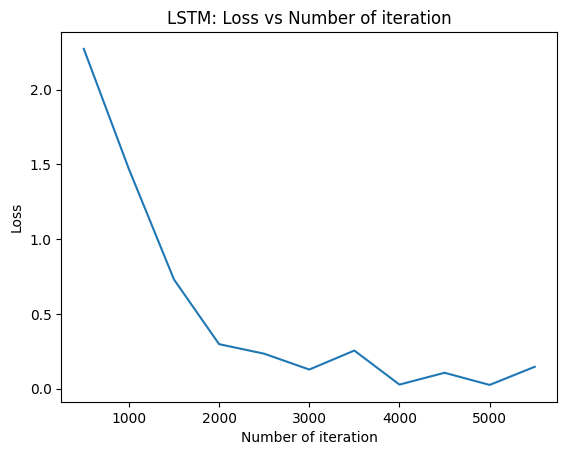

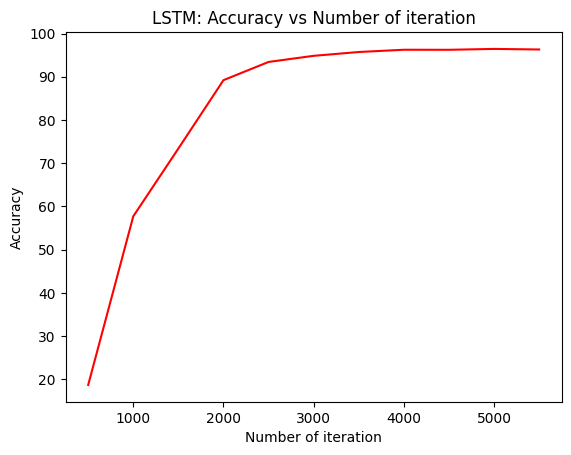

In [12]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("LSTM: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("LSTM: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()